In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

movieInfo = pd.read_csv("./imdb_top_1000.csv")

In [22]:
columns = movieInfo.columns
for column in columns:
    print(column)

Poster_Link
Series_Title
Released_Year
Certificate
Runtime
Genre
IMDB_Rating
Overview
Meta_score
Director
Star1
Star2
Star3
Star4
No_of_Votes
Gross


In [23]:
datasetMean = movieInfo["IMDB_Rating"].mean()
print("Mean is:", datasetMean)

Mean is: 7.949299999999999


In [24]:
uniqueGenres = pd.unique(movieInfo["Genre"].str.split(", ", expand=True).stack())
print("Number of unique genres: ", len(uniqueGenres))
print("Unique genres: ", uniqueGenres)

Number of unique genres:  21
Unique genres:  ['Drama' 'Crime' 'Action' 'Adventure' 'Biography' 'History' 'Sci-Fi'
 'Romance' 'Western' 'Fantasy' 'Comedy' 'Thriller' 'Animation' 'Family'
 'War' 'Mystery' 'Music' 'Horror' 'Musical' 'Film-Noir' 'Sport']


In [25]:
results_df = pd.DataFrame({
    'Column Names': [list(columns)],
    'Average Rating': [datasetMean],
    'Number Of Unique Genres': [len(uniqueGenres)]
})
results_df.to_csv('results.csv', index=False)

In [28]:
data = dict(movieInfo['Genre'].apply(lambda x: pd.Series([i for i in x.split(", ")])).stack().value_counts())
print(data)

{'Drama': 724, 'Comedy': 233, 'Crime': 209, 'Adventure': 196, 'Action': 189, 'Thriller': 137, 'Romance': 125, 'Biography': 109, 'Mystery': 99, 'Animation': 82, 'Sci-Fi': 67, 'Fantasy': 66, 'History': 56, 'Family': 56, 'War': 51, 'Music': 35, 'Horror': 32, 'Western': 20, 'Film-Noir': 19, 'Sport': 19, 'Musical': 17}


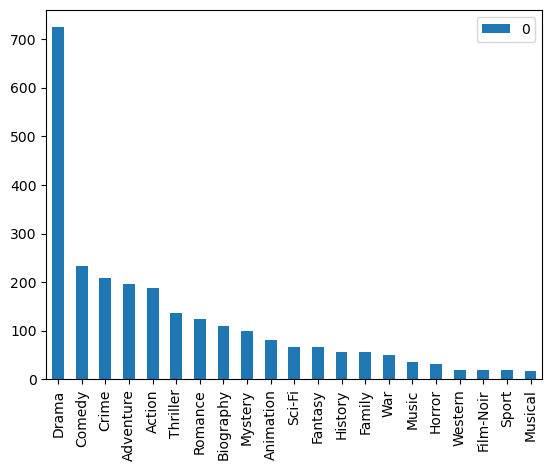

In [29]:
df = pd.DataFrame(movieInfo['Genre'].apply(lambda x: pd.Series([i for i in x.split(", ")])).stack().value_counts())

bar = df.plot.bar()


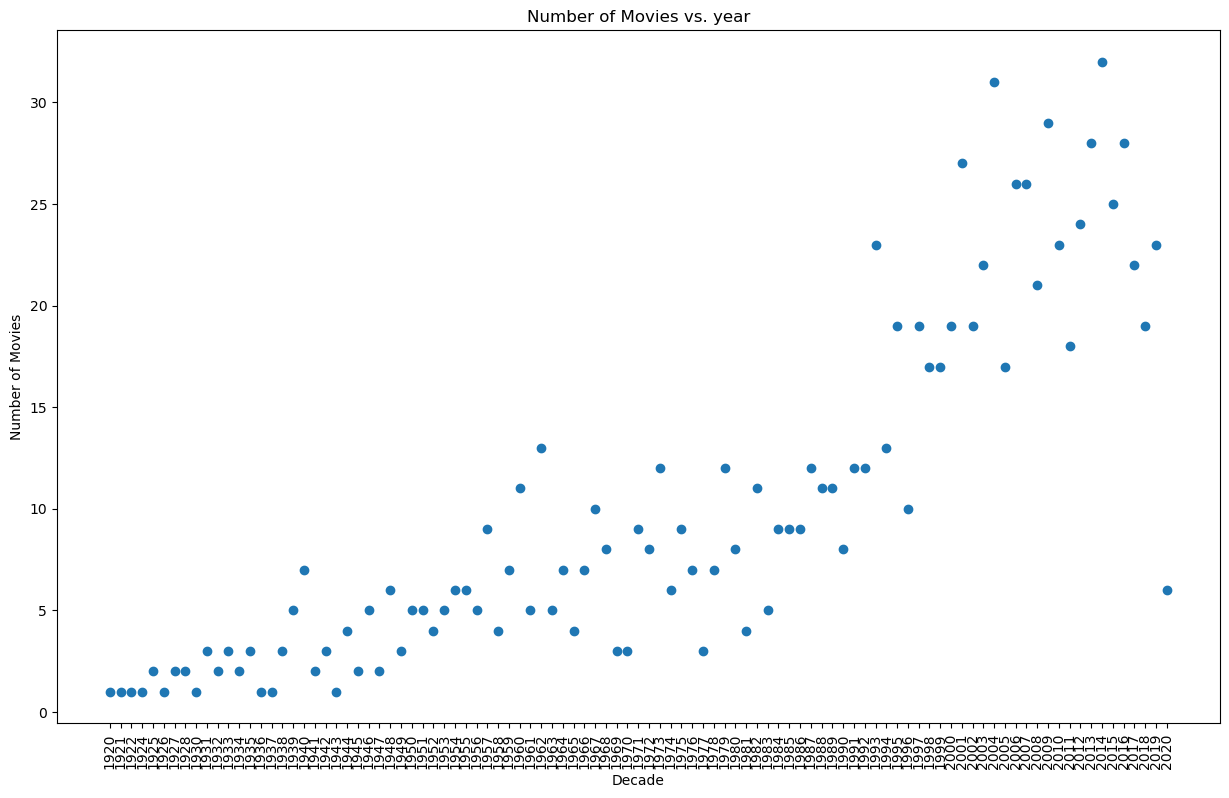

In [30]:
changed_to_int = [year for year in movieInfo['Released_Year'] if year.isdigit()]

decade_counts = pd.Series(changed_to_int).value_counts().sort_index()
plt.figure(figsize=(15,9))

plt.scatter(decade_counts.index, decade_counts.values)
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.title('Number of Movies vs. year')
plt.xticks(rotation = 90) #
plt.show()